In [30]:
import yfinance as yf
import pandas as pd
from datetime import date

# Define the stock and the time period
ticker_symbol = "RELIANCE.NS"
start_date = "2020-01-01"
end_date = date.today().strftime("%Y-%m-%d")
try:
    print(f"Downloading 5 years of stock data for {ticker_symbol}...")
    stock_df = yf.download(ticker_symbol, start=start_date, end=end_date)

    if not stock_df.empty:
        file_path = "reliance_stock_data_5_years.csv"
        stock_df.to_csv(file_path)
        print(f"✅ Success! Data downloaded and saved to '{file_path}'")
        print(f"Data shape: {stock_df.shape}")
        display(stock_df.tail())
    else:
        print("❌ Download failed. The returned data was empty.")

except Exception as e:
    print(f"An error occurred: {e}")

[*********************100%***********************]  1 of 1 completed

✅ Success! Data downloaded and saved to 'reliance_stock_data_5_years.csv'
Data shape: (1447, 5)


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2025-10-28,1486.900024,1492.000000,1477.599976,1484.099976,17631577
2025-10-29,1504.199951,1508.300049,1488.099976,1490.000000,11884745
2025-10-30,1488.500000,1503.099976,1484.000000,1500.000000,9318663
2025-10-31,1486.400024,1497.500000,1482.300049,1490.400024,8758053
2025-11-03,1484.699951,1495.000000,1479.300049,1486.000000,8450663


In [31]:
!pip install gnews

In [32]:
import pandas as pd
from gnews import GNews
import time
from datetime import datetime

# This list will store all the articles we find
all_news = []
start_year = 2020
end_year = datetime.now().year

print(f"Starting deep news search from {start_year} to {end_year}. This will take a long time...")

# Loop through each year and each month
for year in range(start_year, end_year + 1):
    for month in range(1, 13):
        # Stop if we are in the future
        if year == end_year and month > datetime.now().month:
            break
            
        print(f"Fetching news for month: {year}-{month:02d}...")
        
        # Define the start and end date for the current month
        start_date = (year, month, 1)
        if month == 12:
            end_date = (year + 1, 1, 1)
        else:
            end_date = (year, month + 1, 1)
            
        # Initialize GNews for this specific time period
        google_news = GNews(language='en', country='IN', start_date=start_date, end_date=end_date)
        
        # Get the news and add it to our master list
        monthly_news = google_news.get_news('Reliance Industries')
        if monthly_news:
            all_news.extend(monthly_news)
        
        # Be polite to the server and wait 1 second between requests
        time.sleep(1)

# --- Process the final, large dataset ---
if all_news:
    news_df = pd.DataFrame(all_news)
    
    # Clean up and save the data
    news_df = news_df[['published date', 'title', 'publisher']]
    news_df.rename(columns={'published date': 'date', 'publisher': 'source'}, inplace=True)
    
    file_path = "reliance_news_data_FULL.csv"
    news_df.to_csv(file_path, index=False)
    
    print(f"\n✅ FULL news download complete! Data saved to '{file_path}'")
    print(f"Total articles found: {len(news_df)}")
    display(news_df.head())
else:
    print("❌ No articles were found with the deep search.")

Starting deep news search from 2020 to 2025. This will take a long time...
Fetching news for month: 2020-01...
Fetching news for month: 2020-02...


KeyboardInterrupt: 

In [34]:
import pandas as pd

file_path = "reliance_stock_data_5_years.csv"

print("Starting the one-time fix for the stock data CSV file...")

try:
    # Step 1: Load the messy CSV file using our robust command
    clean_df = pd.read_csv(
        file_path,
        index_col=0,
        parse_dates=True,
        skiprows=[1, 2]
    )
    clean_df.index.name = 'Date'
    print(" -> Successfully loaded the messy data into memory.")

    # Step 2: Save the clean DataFrame back to the SAME file path
    # This will OVERWRITE the old, messy file with a clean one.
    clean_df.to_csv(file_path)
    print(f" -> Successfully saved a clean version back to '{file_path}'.")

    print("\n✅✅✅ PERMANENT FIX COMPLETE ✅✅✅")
    print("The stock data CSV file is now permanently fixed. You will not see this error again.")

except Exception as e:
    print(f"An error occurred during the fix: {e}")

Starting the one-time fix for the stock data CSV file...
 -> Successfully loaded the messy data into memory.
 -> Successfully saved a clean version back to 'reliance_stock_data_5_years.csv'.

✅✅✅ PERMANENT FIX COMPLETE ✅✅✅
The stock data CSV file is now permanently fixed. You will not see this error again.


In [5]:
!conda install -c conda-forge nltk -y

Jupyter detected...
3 channel Terms of Service accepted
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.



In [35]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# --- NLTK Setup ---
# This directly downloads the required resources.
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
# --------------------

# Initialize the tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Cleans a text string by making it lowercase, removing punctuation,
    numbers, stopwords, and then lemmatizing the words.
    """
    if not isinstance(text, str):
        return ""
        
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    words = text.lower().split()
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return " ".join(cleaned_words)

print("✅ The clean_text function is now ready to use.")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\devGo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\devGo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\devGo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


✅ The clean_text function is now ready to use.


In [36]:
import pandas as pd

# Load the full news dataset from the CSV file
file_path = "reliance_news_data_FULL.csv"
news_df = pd.read_csv(file_path)

# Apply our cleaning function to the 'title' column
print("Cleaning all news headlines... this may take a minute.")
news_df['cleaned_title'] = news_df['title'].apply(clean_text)
print("✅ Text cleaning complete.")

# Display the original and cleaned titles to see the result
display(news_df[['title', 'cleaned_title']].head())

Cleaning all news headlines... this may take a minute.
✅ Text cleaning complete.


,title,cleaned_title
0,Reliance to supply waste plastic mixture to st...,reliance supply waste plastic mixture strength...
1,Is 2020 The Year That Reliance Becomes India's...,year reliance becomes india digital champion v...
2,Reliance Industries posts record Q3 profit at ...,reliance industry post record q profit r crore...
3,Mukesh Ambani: Asia's richest man takes on ret...,mukesh ambani asia richest man take retail gia...
4,Reliance to enter restaurant business with Arm...,reliance enter restaurant business armani et r...


In [37]:
import os
import shutil
from pathlib import Path

# Define the cache directory
cache_dir = Path.home() / ".cache" / "huggingface"

try:
    if os.path.exists(cache_dir):
        print(f"Found cache directory at: {cache_dir}")
        shutil.rmtree(cache_dir)
        print("✅ Hugging Face cache has been cleared successfully.")
    else:
        print("Cache directory not found, no action needed.")

except Exception as e:
    print(f"An error occurred while clearing the cache: {e}")

Found cache directory at: C:\Users\devGo\.cache\huggingface
✅ Hugging Face cache has been cleared successfully.


In [38]:
import pandas as pd
import torch
# --- CHANGE 1: Import the specific BERT model class ---
from transformers import AutoTokenizer, BertForSequenceClassification

# --- 1. Load the FinBERT Model and Tokenizer ---
print("Loading FinBERT model and tokenizer...")
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
# --- CHANGE 2: Use the specific class to load the model ---
model = BertForSequenceClassification.from_pretrained("ProsusAI/finbert")
print("✅ Model and tokenizer loaded.")

# --- 2. Load Your Cleaned News Data ---
file_path = "reliance_news_data_FULL.csv"
news_df = pd.read_csv(file_path)
news_df.dropna(subset=['title'], inplace=True)
news_df['cleaned_title'] = news_df['title'].apply(clean_text)

# --- 3. Define a Function for Batch Sentiment Analysis ---
def get_finbert_sentiments(text_list):
    inputs = tokenizer(text_list, padding=True, truncation=True, return_tensors="pt", max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment_labels = [model.config.id2label[label_id] for label_id in torch.argmax(predictions, dim=1).tolist()]
    return sentiment_labels

# --- 4. Process the Headlines in Batches ---
print("\nStarting sentiment analysis with FinBERT. This will take a very long time...")
batch_size = 64
all_sentiments = []
titles_to_process = news_df['cleaned_title'].tolist()

for i in range(0, len(titles_to_process), batch_size):
    batch = titles_to_process[i:i + batch_size]
    sentiments = get_finbert_sentiments(batch)
    all_sentiments.extend(sentiments)
    print(f"  Processed {min(i + batch_size, len(titles_to_process))}/{len(titles_to_process)} headlines...")

# --- 5. Add Sentiments to DataFrame ---
news_df['finbert_sentiment'] = all_sentiments
print("\n✅ FinBERT sentiment analysis complete.")
display(news_df[['cleaned_title', 'finbert_sentiment']].head())

# Save the results to a new CSV
news_df.to_csv("reliance_news_with_finbert_sentiment.csv", index=False)
print("✅ Results have been saved to 'reliance_news_with_finbert_sentiment.csv'")

Loading FinBERT model and tokenizer...


C:\Users\devGo\.conda\envs\capstone_v2\lib\site-packages\huggingface_hub\file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
11/04/2025 12:53:21 AM - Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

✅ Model and tokenizer loaded.

Starting sentiment analysis with FinBERT. This will take a very long time...
  Processed 64/6339 headlines...
  Processed 128/6339 headlines...
  Processed 192/6339 headlines...
  Processed 256/6339 headlines...
  Processed 320/6339 headlines...
  Processed 384/6339 headlines...
  Processed 448/6339 headlines...
  Processed 512/6339 headlines...
  Processed 576/6339 headlines...
  Processed 640/6339 headlines...
  Processed 704/6339 headlines...
  Processed 768/6339 headlines...
  Processed 832/6339 headlines...
  Processed 896/6339 headlines...
  Processed 960/6339 headlines...
  Processed 1024/6339 headlines...
  Processed 1088/6339 headlines...
  Processed 1152/6339 headlines...
  Processed 1216/6339 headlines...
  Processed 1280/6339 headlines...
  Processed 1344/6339 headlines...
  Processed 1408/6339 headlines...
  Processed 1472/6339 headlines...
  Processed 1536/6339 headlines...
  Processed 1600/6339 headlines...
  Processed 1664/6339 headlines..

,cleaned_title,finbert_sentiment
0,reliance supply waste plastic mixture strength...,neutral
1,year reliance becomes india digital champion v...,neutral
2,reliance industry post record q profit r crore...,positive
3,mukesh ambani asia richest man take retail gia...,neutral
4,reliance enter restaurant business armani et r...,neutral


✅ Results have been saved to 'reliance_news_with_finbert_sentiment.csv'


In [39]:
import pandas as pd
import numpy as np

# --- 1. Load Your Two Processed Datasets ---
print("Loading processed stock and news data...")
stock_df = pd.read_csv("reliance_stock_data_5_years.csv", index_col=0, parse_dates=True)
news_df = pd.read_csv("reliance_news_with_finbert_sentiment.csv")
print(" -> Data loaded.")

# --- 2. Process the Stock Data (Manual Indicators) ---
print("Calculating technical indicators (SMA and RSI)...")

# Calculate 14-day Simple Moving Average (SMA)
stock_df['SMA_14'] = stock_df['Close'].rolling(window=14).mean()

# Function to calculate RSI
def calculate_rsi(data, window=14):
    close_prices = data['Close']
    delta = close_prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate 14-day RSI
stock_df['RSI_14'] = calculate_rsi(stock_df)
stock_df.dropna(inplace=True) # Drop rows with NaN values from indicator calculation
print(" -> Indicators calculated.")


# --- 3. Process the News Data ---
print("Processing news sentiment scores...")
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
news_df['sentiment_score'] = news_df['finbert_sentiment'].map(sentiment_map)
news_df['date'] = pd.to_datetime(news_df['date'])
news_df['just_date'] = news_df['date'].dt.date
daily_sentiment = news_df.groupby('just_date')['sentiment_score'].mean().reset_index()
daily_sentiment['just_date'] = pd.to_datetime(daily_sentiment['just_date'])
print(" -> Sentiment processed.")


# --- 4. Merge the Datasets ---
print("Merging stock and sentiment data...")
final_df = stock_df.merge(daily_sentiment, left_index=True, right_on='just_date', how='left')
final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment
final_df.dropna(inplace=True) # Drop any remaining NaN rows (usually from the start)
final_df.set_index('just_date', inplace=True)
final_df.index.name = 'Date'
print(" -> Data merged.")


# --- 5. Save the Final, Clean Master Dataset ---
final_df.to_csv("final_master_dataset.csv")
print("\n✅✅✅ Final master dataset created and saved to 'final_master_dataset.csv'!")
display(final_df.head())

Loading processed stock and news data...
 -> Data loaded.
Calculating technical indicators (SMA and RSI)...
 -> Indicators calculated.
Processing news sentiment scores...
 -> Sentiment processed.
Merging stock and sentiment data...
 -> Data merged.

✅✅✅ Final master dataset created and saved to 'final_master_dataset.csv'!


C:\Users\devGo\AppData\Local\Temp\ipykernel_17460\1417212574.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment
C:\Users\devGo\AppData\Local\Temp\ipykernel_17460\1417212574.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment


,Close,High,Low,Open,Volume,SMA_14,RSI_14,sentiment_score
Date,,,,,,,,
2020-01-20,685.501465,719.791084,682.839700,719.791084,32545850,685.892957,54.332498,0.166667
2020-01-21,686.195007,691.540874,680.871478,683.824044,18922720,686.669442,54.600577,0.333333
2020-01-22,685.948853,691.943392,684.942307,690.713176,10322817,686.607130,49.591948,0.333333
2020-01-23,683.041077,689.796095,680.289844,687.358000,11247739,686.278006,47.885884,0.000000
2020-01-24,680.670166,687.290983,679.328085,683.108201,14628445,686.918679,54.701047,0.000000


In [40]:
import pandas as pd
df = pd.read_csv("final_master_dataset.csv")
print("--- Verifying the final_master_dataset.csv file ---")
display(df.tail())

--- Verifying the final_master_dataset.csv file ---


,Date,Close,High,Low,Open,Volume,SMA_14,RSI_14,sentiment_score
1429,2025-10-28,1486.900024,1492.000000,1477.599976,1484.099976,17631577,1419.300014,76.826068,-0.500000
1430,2025-10-29,1504.199951,1508.300049,1488.099976,1490.000000,11884745,1429.071437,85.962158,-0.333333
1431,2025-10-30,1488.500000,1503.099976,1484.000000,1500.000000,9318663,1436.978577,78.312043,-0.100000
1432,2025-10-31,1486.400024,1497.500000,1482.300049,1490.400024,8758053,1444.457153,77.026372,0.000000
1433,2025-11-03,1484.699951,1495.000000,1479.300049,1486.000000,8450663,1452.292864,79.067297,0.181818


In [41]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Create a new DataFrame with only the features we'll use for modeling
# We are dropping columns like Open, High, Low as they are highly correlated with Close
model_df = final_df[['Close', 'Volume', 'SMA_14', 'RSI_14', 'sentiment_score']]

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(model_df)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=model_df.columns, index=model_df.index)

print("✅ Data has been successfully scaled.")
display(scaled_df.head())

✅ Data has been successfully scaled.


,Close,Volume,SMA_14,RSI_14,sentiment_score
Date,,,,,
2020-01-20,0.242967,0.228098,0.206927,0.518805,0.583333
2020-01-21,0.243548,0.132620,0.207626,0.521789,0.666667
2020-01-22,0.243342,0.072348,0.207570,0.466039,0.666667
2020-01-23,0.240906,0.078830,0.207273,0.447050,0.500000
2020-01-24,0.238920,0.102524,0.207850,0.522908,0.500000


In [42]:
import numpy as np

# --- Create sequences ---
# We'll look at 60 days of history to predict the 61st day
time_step = 60
X_data, y_data = [], []

# Loop through the scaled data to create the sequences
for i in range(time_step, len(scaled_df)):
    # X_data will contain a window of the previous 60 days
    X_data.append(scaled_df.iloc[i-time_step:i].values)
    # y_data will contain the closing price of the 61st day
    # .iloc[i, 0] gets the 'Close' price, which is the first column
    y_data.append(scaled_df.iloc[i, 0])

# Convert the lists to numpy arrays
X_data, y_data = np.array(X_data), np.array(y_data)

print("✅ Data has been successfully converted into sequences.")
print(f"Shape of X_data: {X_data.shape}")
print(f"Shape of y_data: {y_data.shape}")

✅ Data has been successfully converted into sequences.
Shape of X_data: (1374, 60, 5)
Shape of y_data: (1374,)


In [43]:
# Define the split point (80% of the data for training)
train_size = int(len(X_data) * 0.8)

# Split the data chronologically
X_train, X_test = X_data[:train_size], X_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

print("✅ Data has been successfully split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

✅ Data has been successfully split into training and testing sets.
X_train shape: (1099, 60, 5)
y_train shape: (1099,)
X_test shape: (275, 60, 5)
y_test shape: (275,)


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the model architecture (without the outdated 'time_major' argument)
model = Sequential()

# Add the first LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Add a second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

C:\Users\devGo\.conda\envs\capstone_v2\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,451 (122.86 KB)

 Trainable params: 31,451 (122.86 KB)

 Non-trainable params: 0 (0.00 B)

Making predictions on the test data...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
✅ Predictions have been converted back to actual Rupee values.

Model Performance on Test Data:
Mean Absolute Error (MAE): 941.05 INR
R-squared (R²) Score: -103.73


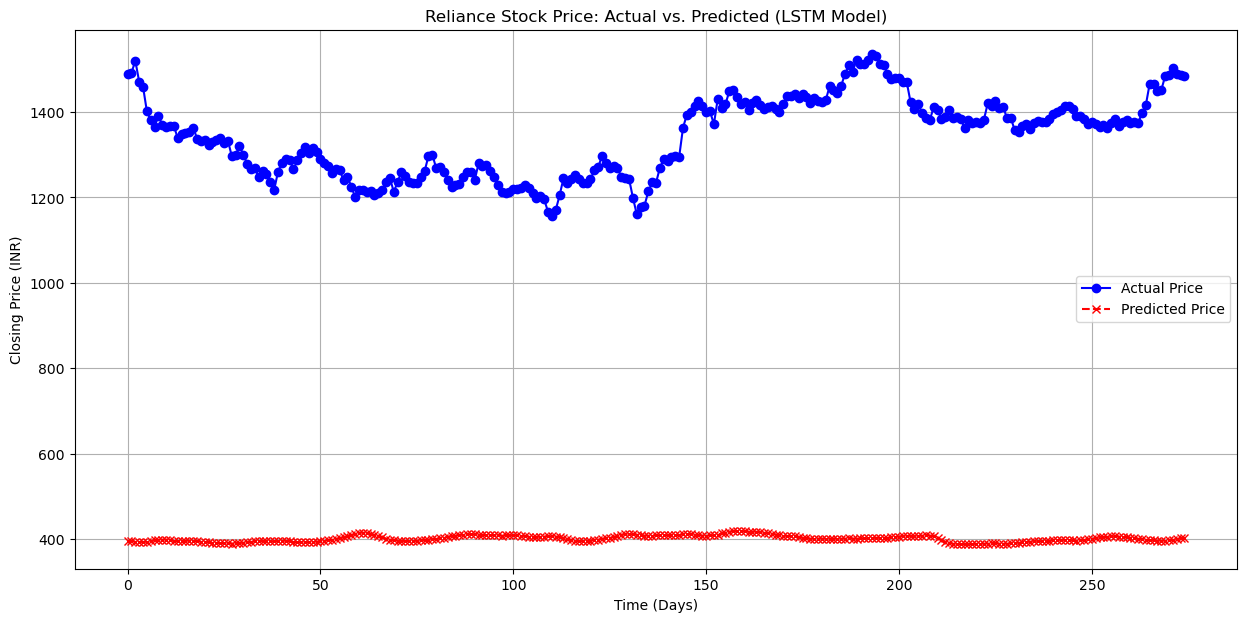

In [45]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# --- 1. Make Predictions on the Test Data ---
print("Making predictions on the test data...")
predictions_scaled = model.predict(X_test)

# --- 2. Inverse Scale the Predictions and Actuals ---
# We need to reshape the data to have 5 columns to match the scaler's input shape
# Create a dummy array with the same shape as the original data
dummy_array_pred = np.zeros((len(predictions_scaled), 5))
# Place our predictions into the first column (the 'Close' price column)
dummy_array_pred[:, 0] = predictions_scaled.ravel()
# Inverse transform the dummy array
predictions_actual = scaler.inverse_transform(dummy_array_pred)[:, 0]

# Do the same for the y_test actual values
dummy_array_actual = np.zeros((len(y_test), 5))
dummy_array_actual[:, 0] = y_test.ravel()
y_test_actual = scaler.inverse_transform(dummy_array_actual)[:, 0]
print("✅ Predictions have been converted back to actual Rupee values.")


# --- 3. Evaluate the Model's Performance ---
mae = mean_absolute_error(y_test_actual, predictions_actual)
r2 = r2_score(y_test_actual, predictions_actual)
print(f"\nModel Performance on Test Data:")
print(f"Mean Absolute Error (MAE): {mae:.2f} INR")
print(f"R-squared (R²) Score: {r2:.2f}")


# --- 4. Visualize the Results ---
plt.figure(figsize=(15, 7))
plt.plot(y_test_actual, label='Actual Price', color='blue', marker='o', linestyle='-')
plt.plot(predictions_actual, label='Predicted Price', color='red', marker='x', linestyle='--')
plt.title('Reliance Stock Price: Actual vs. Predicted (LSTM Model)')
plt.xlabel('Time (Days)')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.grid(True)
plt.savefig('lstm_prediction_vs_actual.png')
plt.show()

In [46]:
print("Starting model training... this will take several minutes.")

# Train the model
# epochs=50 means the model will see the entire dataset 50 times
# batch_size=32 means the model will look at 32 samples at a time
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

print("\n✅✅✅ Model training complete!")

Starting model training... this will take several minutes.
Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.0978 - val_loss: 0.0039
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0079 - val_loss: 0.0014
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0060 - val_loss: 0.0014
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0054 - val_loss: 0.0014
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0048 - val_loss: 0.0019
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0044 - val_loss: 0.0015
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0036 - val_loss: 0.0019
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0039 - val_loss: 0.0021
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0042 - val_loss: 0.0035
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0041 - val_loss: 0.0018
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0038 - val_loss: 0.0013
Epoc

In [47]:
import joblib

# Save the trained LSTM model
model.save('lstm_model.h5')
print("✅ Model has been saved in .h5 format.")

# Save the scaler object
joblib.dump(scaler, 'scaler.pkl')
print("✅ Scaler has been saved to scaler.pkl.")

11/04/2025 01:01:30 AM - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


✅ Model has been saved in .h5 format.
✅ Scaler has been saved to scaler.pkl.
